<a href="https://colab.research.google.com/github/shumshersubashgautam/Thermonuclear_Supernova_Classification/blob/main/Thermonuclear_Supernova_Classification_via_their_Nuclear_Signatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title 
# imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
pyo.init_notebook_mode()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import SCORERS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from numpy import absolute, mean, std
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
filterwarnings('ignore')
     

**About**

Using Thermonuclear Supernovae (Type-Ia or SNeIa) simulation data, the aim of this iPython Notebook is to identify machine learning and computational techniques suitable for producing a cluster-predict model that identifies cluster classes based on observable parameters and identifies suitable regression algorithms for prediction in order to ultimately establish classification metrics for Type-Ia supernovae.

**Data**

The supernova simulation gamma-ray dataset for L1 and L2 light curves are uploaded as dataframes. The files, with 512 data points each, are identical save for the tau and tau uncertainty parameters for the respective datasets.

In [5]:
# initialize data frame L1
df_L1 = pd.read_csv('GSOC_DataCube_L1.txt', sep=" ", header=None)
df_L1.columns = ["tau_L1", "tau_uncertainty_L1", "vmax", "vmax_uncertainty", "phi300", "total_mass", "mass_56_Ni", "explosion_energy", "init_SNeIa_dist_flag", "init_56Ni_dist_flag"]

# initialize data frame L2
df_L2 = pd.read_csv('GSOC_DataCube_L2.txt', sep=" ", header=None)
df_L2.columns = ["tau_L2", "tau_uncertainty_L2", "vmax", "vmax_uncertainty", "phi300", "total_mass", "mass_56_Ni", "explosion_energy", "init_SNeIa_dist_flag", "init_56Ni_dist_flag"]
     

In [4]:
cd data

/content/data


In [6]:

# view part of data frame
df_L1.head()
     

tau_L1  tau_uncertainty_L1      vmax  vmax_uncertainty    phi300  \
0  1.333810            0.081978  0.013531          0.000670  0.000003   
1  1.853153            0.183197  0.012423          0.000615  0.000003   
2  1.682448            0.154169  0.012744          0.000685  0.000003   
3  1.123935            0.108683  0.009935          0.000349  0.000003   
4  1.295746            0.079293  0.013343          0.000745  0.000003   

   total_mass  mass_56_Ni  explosion_energy init_SNeIa_dist_flag  \
0        0.75        0.15              0.75                 hed8   
1        0.75        0.15              0.75                 hed8   
2        0.75        0.15              0.75                 hed8   
3        0.75        0.15              0.75                 hed8   
4        0.75        0.15              2.00                 hed8   

  init_56Ni_dist_flag  
0                hed8  
1                 mwd  
2                N100  
3                w7dt  
4                hed8

In [7]:
# view part of data frame
df_L2.head()

tau_L2  tau_uncertainty_L2      vmax  vmax_uncertainty    phi300  \
0  1.940628            0.179354  0.013531          0.000670  0.000003   
1  2.071999            0.210287  0.012423          0.000615  0.000003   
2  2.007982            0.198804  0.012744          0.000685  0.000003   
3  1.661535            0.189436  0.009935          0.000349  0.000003   
4  1.907672            0.178607  0.013343          0.000745  0.000003   

   total_mass  mass_56_Ni  explosion_energy init_SNeIa_dist_flag  \
0        0.75        0.15              0.75                 hed8   
1        0.75        0.15              0.75                 hed8   
2        0.75        0.15              0.75                 hed8   
3        0.75        0.15              0.75                 hed8   
4        0.75        0.15              2.00                 hed8   

  init_56Ni_dist_flag  
0                hed8  
1                 mwd  
2                N100  
3                w7dt  
4                hed8

In [8]:
# L1 observable data
df_observable_L1 = df_L1[["tau_L1"]]
# L2 observable data
df_observable_L2 = df_L2[["tau_L2", "vmax", "phi300"]]
# combined L1 and L2 observable data
df_observable = pd.concat([df_observable_L1, df_observable_L2], axis=1, join='inner')
df_observable.head()

tau_L1    tau_L2      vmax    phi300
0  1.333810  1.940628  0.013531  0.000003
1  1.853153  2.071999  0.012423  0.000003
2  1.682448  2.007982  0.012744  0.000003
3  1.123935  1.661535  0.009935  0.000003
4  1.295746  1.907672  0.013343  0.000003

In [9]:
# average of (tau uncertainty L1 / tau L1)
L1_tau_prop = df_L1['tau_uncertainty_L1']/df_L1['tau_L1']
print("mean (L1 tau uncertainty)/(L1 tau) ratio:", L1_tau_prop.mean())

mean (L1 tau uncertainty)/(L1 tau) ratio: 0.05915889680484547


In [10]:
# average of (tau uncertainty L2 / tau L2)
L2_tau_prop = df_L2['tau_uncertainty_L2']/df_L2['tau_L2']
print("mean (L2 tau uncertainty)/(L2 tau) ratio:", L2_tau_prop.mean())

mean (L2 tau uncertainty)/(L2 tau) ratio: 0.07854475790590862


In [11]:
# average of (vmax uncertainty / vmax)
df_vmax_prop = df_L1['vmax_uncertainty']/df_L1['vmax']
print("mean (vmax uncertainty)/(vmax) ratio:", df_vmax_prop.mean())

mean (vmax uncertainty)/(vmax) ratio: 0.039926915696030366


In [12]:
def plot_clusters_2d_L1(clusters, labels, main_title):
  '''
  Plots three separate 2-D scatterplot projections of the clustering data for L1 data
  
  Inputs: 
  clusters - data frame with cluster information
  labels - cluster information data frame (single column with same amount of rows as clusters df)
  main_title - string for the title of the graph
  '''
  fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
  sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,2], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax1)
  sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax2)
  sns.scatterplot(clusters.iloc[:,2],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax3)

  fig.suptitle(main_title, fontsize=15) 
  plt.show()

def plot_clusters_2d_L2(clusters, labels, main_title):
  '''
  Plots three separate 2-D scatterplot projections of the clustering data for L2 data

  Inputs: 
  clusters - data frame with cluster information
  labels - cluster information data frame (single column with same amount of rows as clusters df)
  main_title - string for the title of the graph
  '''
  fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
  sns.scatterplot(clusters.iloc[:,1],clusters.iloc[:,2], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax1)
  sns.scatterplot(clusters.iloc[:,1],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax2)
  sns.scatterplot(clusters.iloc[:,2],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax3)

  fig.suptitle(main_title, fontsize=15) 
  plt.show()

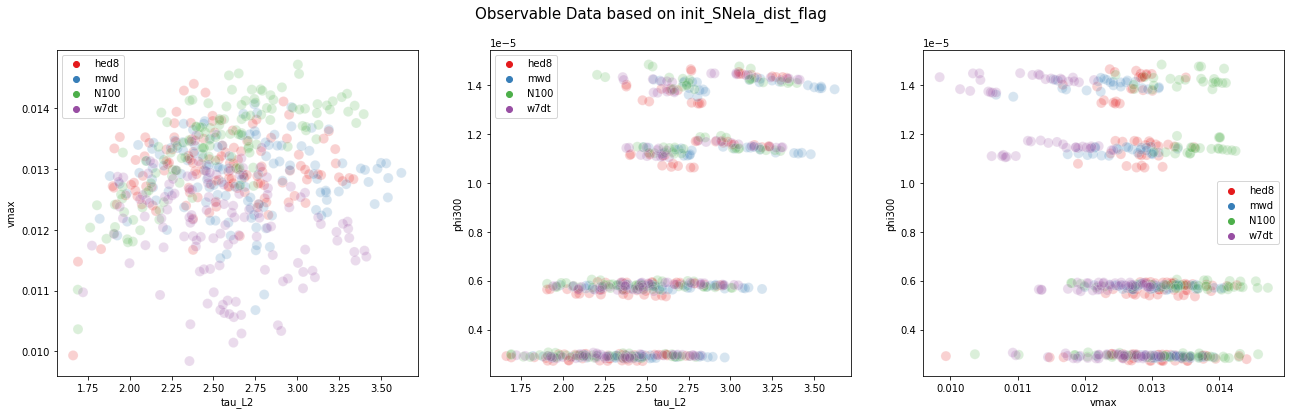

In [16]:
 # copy L2 data frame
df = df_L2.copy()

  # plot observable data based on init_SneIa_dist_flag
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
sns.scatterplot(df.iloc[:,0],df.iloc[:,2], hue=df.loc[:,'init_SNeIa_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax1)
sns.scatterplot(df.iloc[:,0],df.iloc[:,4], hue=df.loc[:,'init_SNeIa_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax2)
sns.scatterplot(df.iloc[:,2],df.iloc[:,4], hue=df.loc[:,'init_SNeIa_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax3)

fig.suptitle("Observable Data based on init_SNeIa_dist_flag", fontsize=15) 
plt.show()

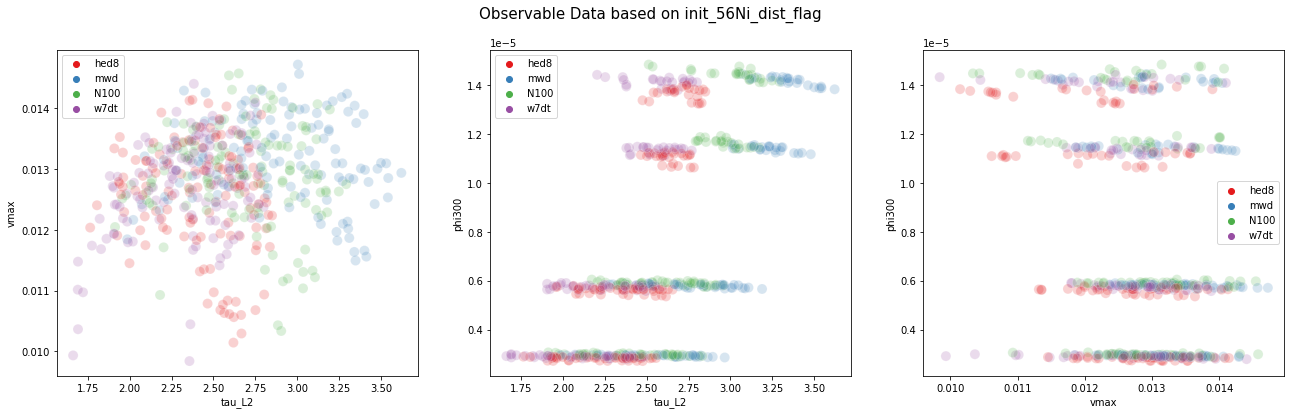

In [18]:
  # plot observable data based on init_56Ni_dist_flag
  fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
  sns.scatterplot(df.iloc[:,0],df.iloc[:,2], hue=df.loc[:,'init_56Ni_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax1)
  sns.scatterplot(df.iloc[:,0],df.iloc[:,4], hue=df.loc[:,'init_56Ni_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax2)
  sns.scatterplot(df.iloc[:,2],df.iloc[:,4], hue=df.loc[:,'init_56Ni_dist_flag'].values, palette='Set1', s=100, alpha=0.2, ax=ax3)

  fig.suptitle("Observable Data based on init_56Ni_dist_flag", fontsize=15) 
  plt.show()

In [19]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(df_observable)
X_scale = scaler.transform(df_observable)
# df_scale is the newly scaled data
df_scale = pd.DataFrame(X_scale, columns=df_observable.columns)
df_scale.head()

tau_L1    tau_L2      vmax    phi300
0 -1.824054 -1.627265  0.845068 -1.105597
1 -0.926036 -1.290953 -0.461417 -1.046349
2 -1.221209 -1.454840 -0.082589 -1.043236
3 -2.186957 -2.341748 -3.395666 -1.060238
4 -1.889872 -1.711635  0.623577 -1.103794

variance array [ 61.2  90.8  99.7 100. ]


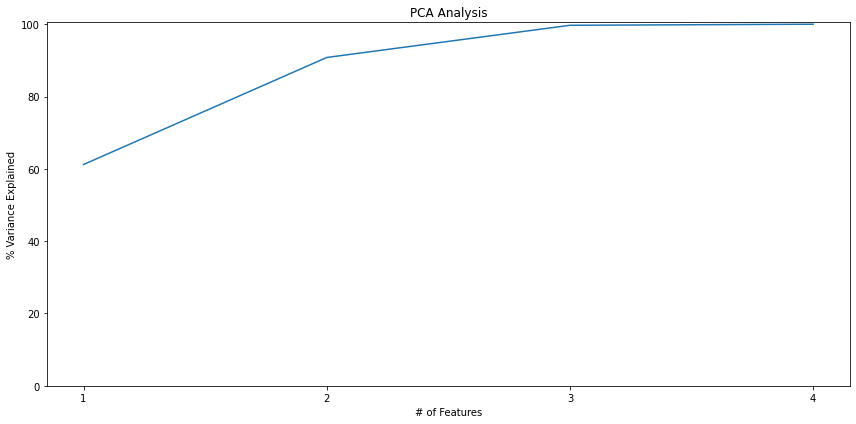

In [20]:
#PCA
def perform_pca_analysis(df):
  '''
  performs PCA on varying number of features and plots the number of features
  vs. the % variance explained for the PCA.

  inputs:
  df - dataframe to perform PCA analysis on
  '''
  # n_components = num features in the dataset
  pca = PCA(n_components=len(df.columns))
  pca.fit(df)
  variance = pca.explained_variance_ratio_
  var = np.cumsum(np.round(variance, 3)*100)
  plt.figure(figsize=(12,6))
  plt.ylabel('% Variance Explained')
  plt.xlabel('# of Features')
  plt.title('PCA Analysis')
  plt.ylim(0,100.5)
  plt.locator_params(axis="both", integer=True, tight=True)
  plt.tight_layout()
  plt.plot([1,2,3,4], var)
  print("variance array", var)

perform_pca_analysis(df_scale)

In [21]:
#perform pca transformation on scaled dataset of observable parameters
pca = PCA(n_components=2)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2'])
print(pca.explained_variance_ratio_)

[0.61163464 0.29616582]


In [22]:
# loadings dataframe
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_scale.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2
variable                    
tau_L1    0.607643 -0.176529
tau_L2    0.627935 -0.080203
vmax      0.063523 -0.875642
phi300    0.482112  0.442330

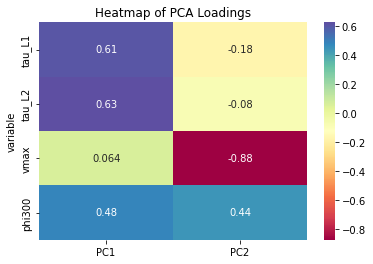

In [23]:
# loadings dataframe as a heat map
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.title("Heatmap of PCA Loadings")
plt.show()
     

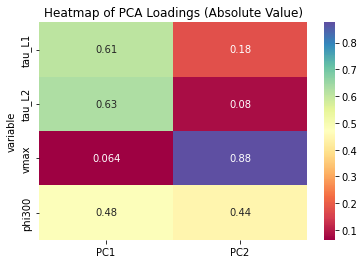

In [24]:
# loadings dataframe as a magnitude heat map
ax = sns.heatmap(loadings_df.abs(), annot=True, cmap='Spectral')
plt.title("Heatmap of PCA Loadings (Absolute Value)")
plt.show()

Text(0, 0.5, 'Inertia')

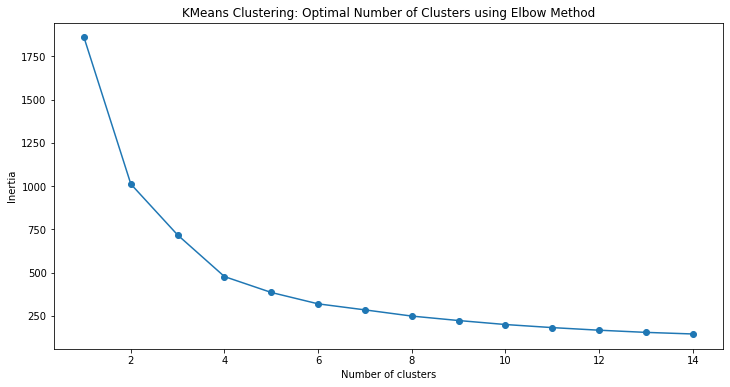

In [25]:
# initialize array for inertia
sse = []
# run kmeans and obtain inertia, appending to array
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])

# plot results
results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('KMeans Clustering: Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

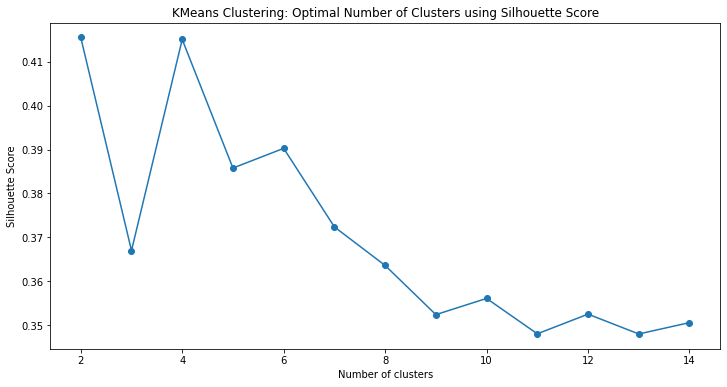

In [26]:
# initialize array for silhouette scores
silhouette = []
# run kmeans for increasing number of clusters and obtain silhouette score
k_list = range(2, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    silhouette.append([k, silhouette_score(pca_df_scale, km.labels_, metric='euclidean')])

# plot results - silhouette score vs. number of clusters
results_scale = pd.DataFrame({'Cluster': range(2,15), 'Silhouette': silhouette})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker='o')
plt.title('KMeans Clustering: Optimal Number of Clusters using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [27]:
# set number of clusters
num_clusters = 4
# run kmeans algorithm
k_means = KMeans(n_clusters=num_clusters, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans Silhouette Score: {}'.format(silhouette_score(pca_df_scale, k_means.labels_, metric='euclidean')))
labels_kmeans = k_means.labels_
clusters_kmeans = pd.concat([df_observable, pd.DataFrame({'clusters':labels_kmeans})], axis=1)
     

KMeans Silhouette Score: 0.4150473727486772


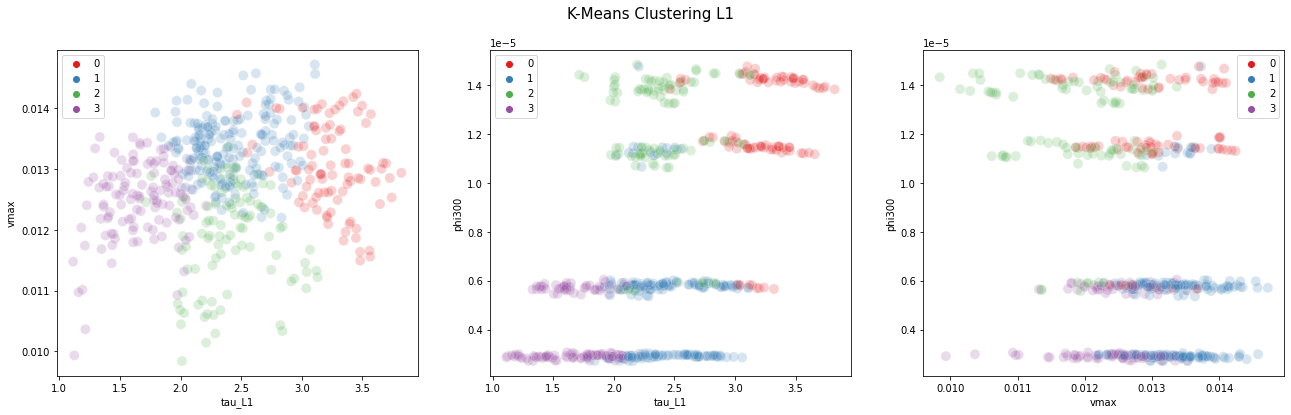

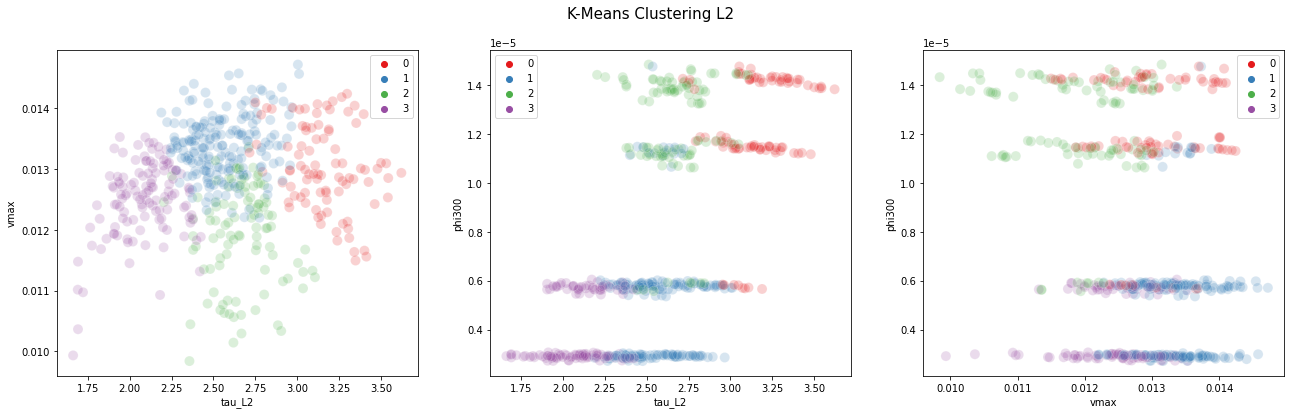

In [28]:
plot_clusters_2d_L1(clusters_kmeans, labels_kmeans, "K-Means Clustering L1")
plot_clusters_2d_L2(clusters_kmeans, labels_kmeans, "K-Means Clustering L2")

Text(0, 0.5, 'Silhouette Score')

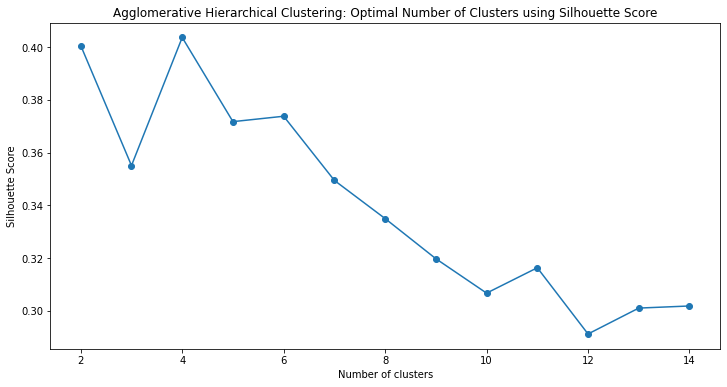

In [29]:
# initialize array for silhouette score
silhouette = []
k_list = range(2, 15)
# run agg clustering to obtain silhouette scores
for k in k_list:
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(pca_df_scale)
    silhouette.append([k, silhouette_score(pca_df_scale, agg.labels_, metric='euclidean')])

# plot silhouette score vs num clusters
results_scale = pd.DataFrame({'Cluster': range(2,15), 'Silhouette': silhouette})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker='o')
plt.title('Agglomerative Hierarchical Clustering: Optimal Number of Clusters using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [30]:
# perform agglomerative clustering
X = pca_df_scale
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
labels_agg = agg_clustering.labels_
clusters_agg = pd.concat([df_observable, pd.DataFrame({'clusters':labels_agg})], axis=1)

print('Agglomerative Clustering Silhouette Score: {}'.format(silhouette_score(pca_df_scale, labels_agg, metric='euclidean')))

Agglomerative Clustering Silhouette Score: 0.40365222565712855


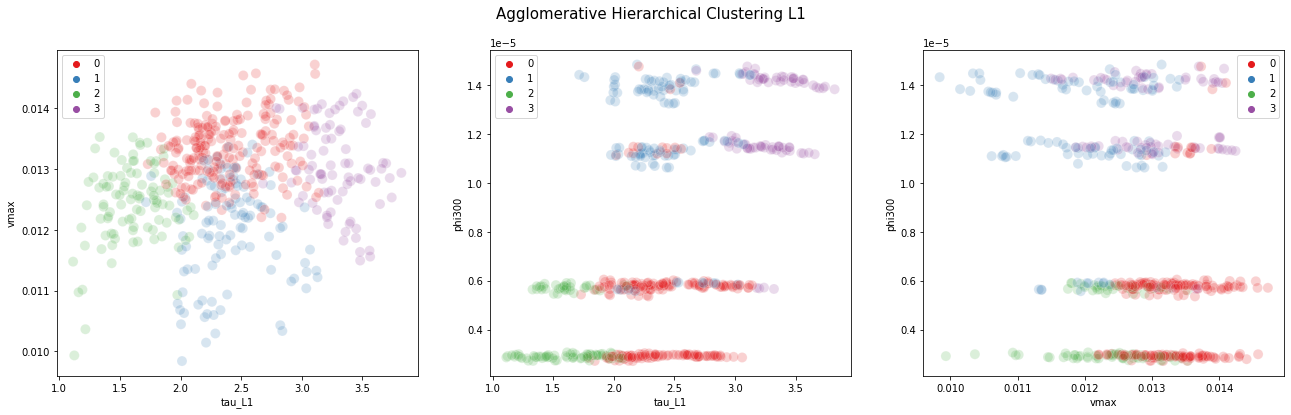

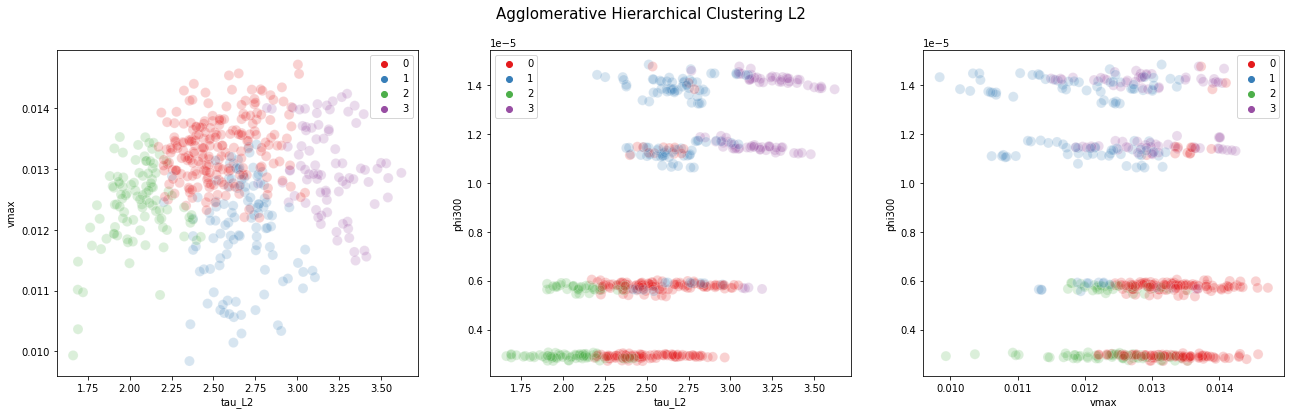

In [31]:
plot_clusters_2d_L1(clusters_agg, labels_agg, "Agglomerative Hierarchical Clustering L1")
plot_clusters_2d_L2(clusters_agg, labels_agg, "Agglomerative Hierarchical Clustering L2")
     

Text(0, 0.5, 'Silhouette Score')

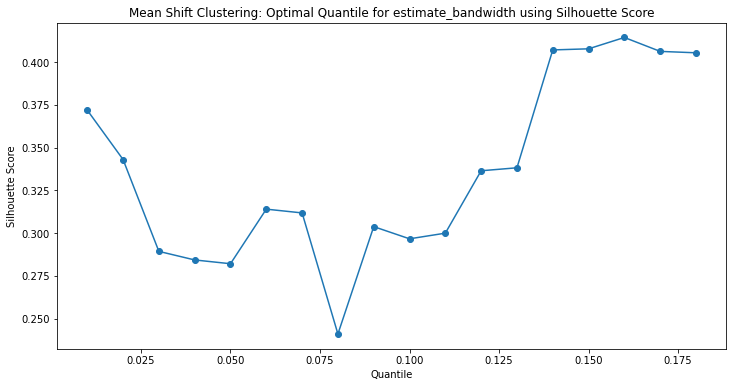

In [32]:
X = pca_df_scale

# intialize silhouette array
silhouette = []
k_list = np.arange(0.01, 0.19, 0.01)
for k in k_list:
    band = estimate_bandwidth(X, quantile=k)
    ms = MeanShift(bandwidth=band, bin_seeding=True)
    ms.fit(X)
    silhouette.append([k, silhouette_score(pca_df_scale, ms.labels_, metric='euclidean')])

# plot silhouette score vs. quantile 
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker='o')
plt.title('Mean Shift Clustering: Optimal Quantile for estimate_bandwidth using Silhouette Score')
plt.xlabel('Quantile')
plt.ylabel('Silhouette Score')
     

In [33]:
# estimate bandwidth with quantile set to 0.15
bandwidth = estimate_bandwidth(X, quantile=0.15)
print('Bandwidth:', bandwidth)
# run ms with estimated bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels_ms = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels_ms)
n_clusters_ = len(labels_unique)

# df with ms clusters results
clusters_ms = pd.concat([df_observable, pd.DataFrame({'clusters':labels_ms})], axis=1)

# print cluster information
print("Number of estimated clusters : %d" % n_clusters_)
print('Mean Shift Clustering Silhouette Score: {}'.format(silhouette_score(pca_df_scale, labels_ms, metric='euclidean')))
     

Bandwidth: 1.1371267332653268
Number of estimated clusters : 2
Mean Shift Clustering Silhouette Score: 0.40781402242179987


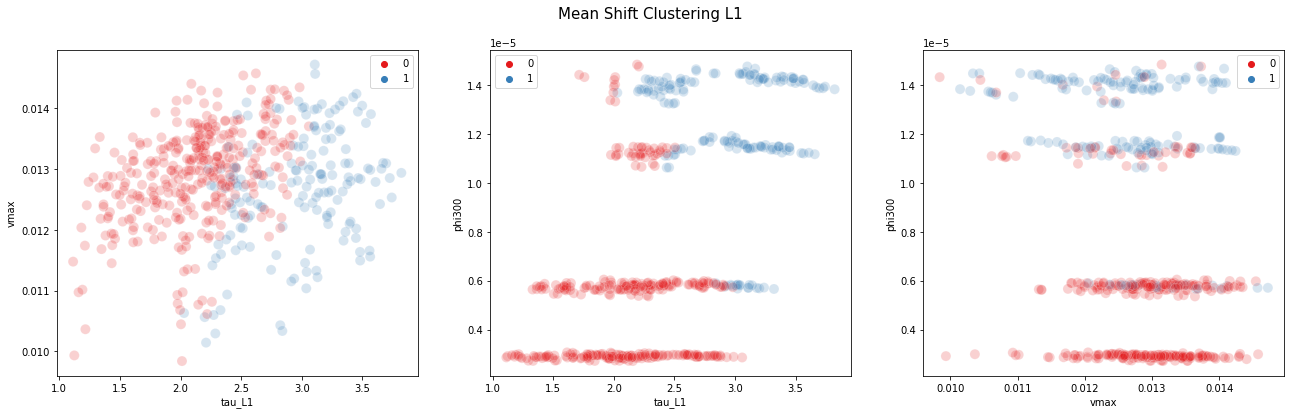

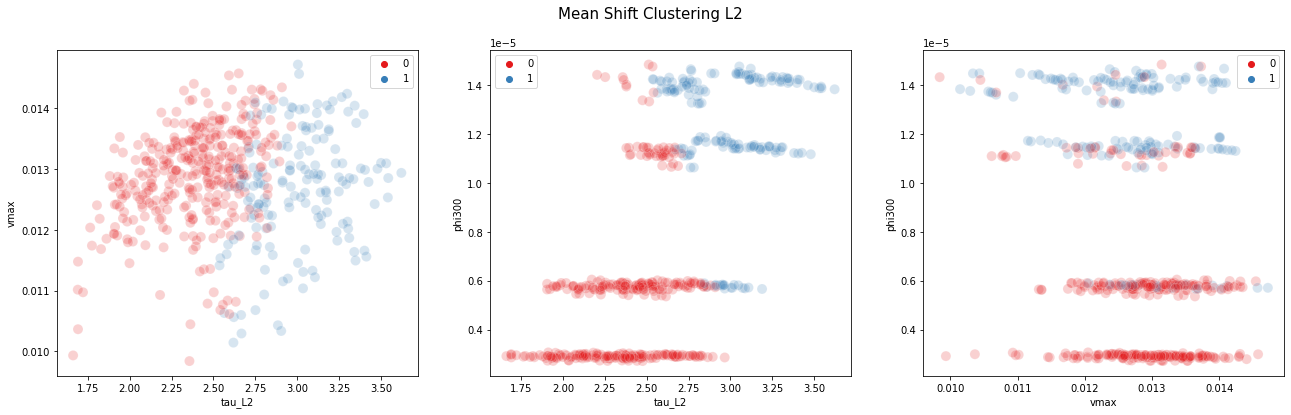

In [34]:
plot_clusters_2d_L1(clusters_ms, labels_ms, "Mean Shift Clustering L1")
plot_clusters_2d_L2(clusters_ms, labels_ms, "Mean Shift Clustering L2")

Text(0.5, 1.0, 'Nearest Neighbors Distances vs. Datapoints Indices')

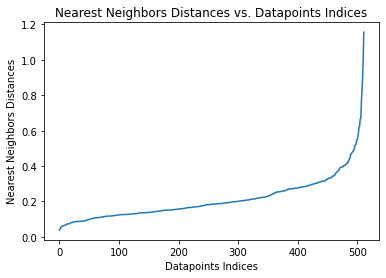

In [35]:
X = pca_df_scale
# run nearest neighbors on data with n_neighbors=minPoints
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
# plot nearest neighbors distances vs. indices of the datapoints
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,3]
plt.plot(distances)
plt.ylabel('Nearest Neighbors Distances')
plt.xlabel('Datapoints Indices')
plt.title('Nearest Neighbors Distances vs. Datapoints Indices')

In [36]:
# Compute DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels_dbscan = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# df of observable data with cluster column appended
clusters_dbscan = pd.concat([df_observable, pd.DataFrame({'clusters':labels_dbscan})], axis=1)

print('DBSCAN Clustering Silhouette Score: {}'.format(silhouette_score(pca_df_scale, labels_dbscan, metric='euclidean')))

Estimated number of clusters: 3
Estimated number of noise points: 15
DBSCAN Clustering Silhouette Score: 0.16640674738518885


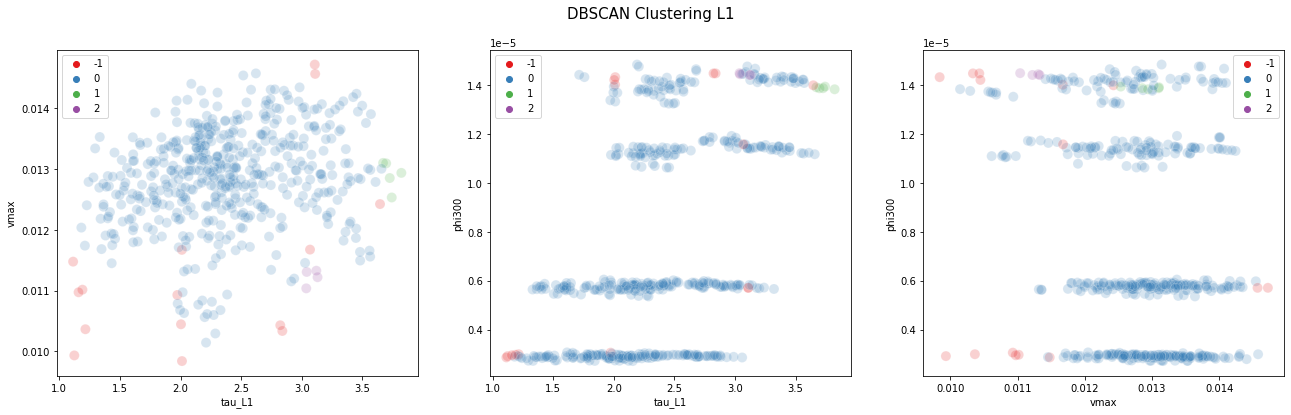

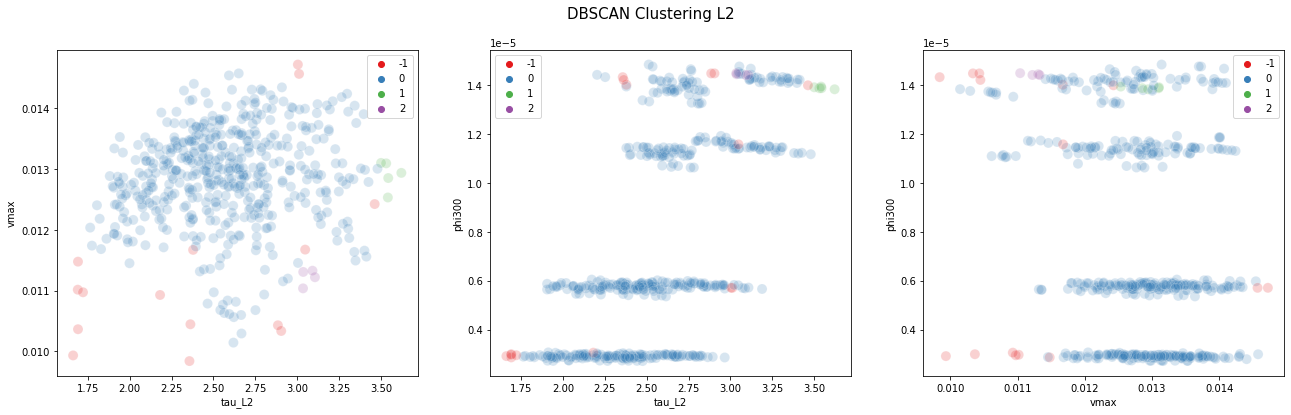

In [37]:
plot_clusters_2d_L1(clusters_dbscan, labels_dbscan, "DBSCAN Clustering L1")
plot_clusters_2d_L2(clusters_dbscan, labels_dbscan, "DBSCAN Clustering L2")

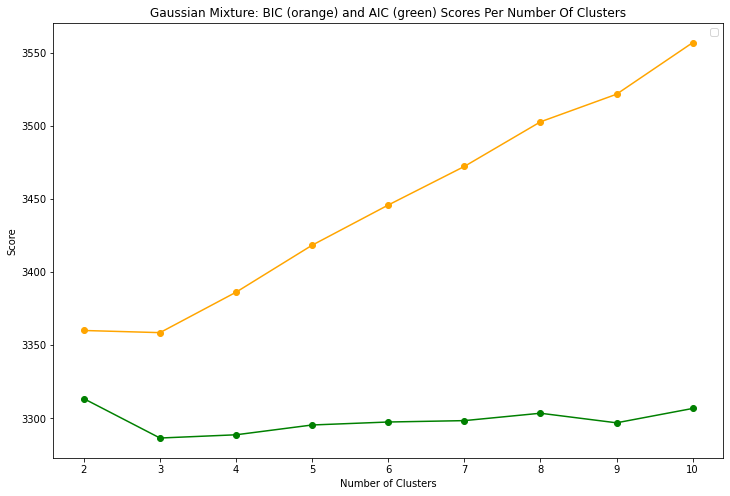

In [38]:
X = pca_df_scale

# set up a range of cluster numbers to try
n_range = range(2,11)

# create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# loop through the range and fit a model
for n in n_range:
    gm = GaussianMixture(n_components=n, random_state=123, n_init=10)
    gm.fit(X)
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(X))
    aic_score.append(gm.aic(X))
    
# plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(n_range, bic_score, '-o', color='orange')
ax.plot(n_range, aic_score, '-o', color='green')
ax.set(xlabel='Number of Clusters', ylabel='Score')
ax.set_xticks(n_range)
ax.set_title('Gaussian Mixture: BIC (orange) and AIC (green) Scores Per Number Of Clusters')
ax.legend()
     

Text(0, 0.5, 'Silhouette Score')

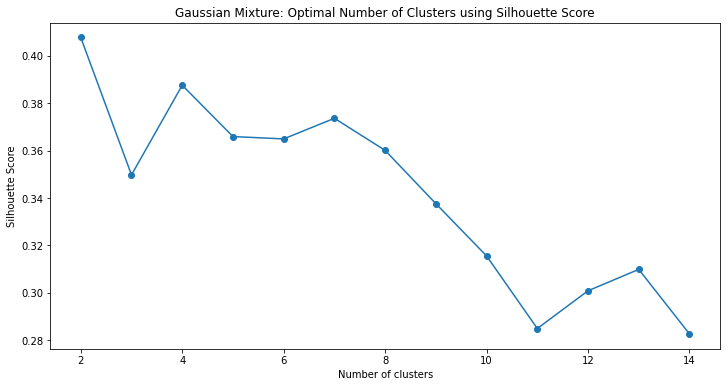

In [39]:
# initialize array to plot silhouette score corresponding to n_clusters
silhouette = []
k_list = range(2, 15)
for k in k_list:
  total_score = 0
  for i in range(20):
    # create GMM for k components (clusters)
    gm = GaussianMixture(n_components=k, random_state=123, n_init=10)
    gm.fit(X)
    total_score += silhouette_score(pca_df_scale, gm.predict(X), metric='euclidean')
  # append to silhouette array
  silhouette.append([k, total_score/20])

# plot silhouette vs. number of clusters
results_scale = pd.DataFrame({'Cluster': range(2,15), 'Silhouette': silhouette})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(silhouette)[0], pd.DataFrame(silhouette)[1], marker='o')
plt.title('Gaussian Mixture: Optimal Number of Clusters using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [40]:
#  set number of clusters = 4
n = 4
# GMM
gm = GaussianMixture(n_components=n, random_state=123, n_init=10)
gm.fit(X)
labels_gm = gm.predict(X)
# create resulting clusters df for GMM
clusters_gm = pd.concat([df_observable, pd.DataFrame({'clusters':labels_gm})], axis=1)
print('Gaussian Mixture Model Clustering Silhouette Score: {}'.format(silhouette_score(pca_df_scale, labels_gm, metric='euclidean')))

Gaussian Mixture Model Clustering Silhouette Score: 0.3875801905603714


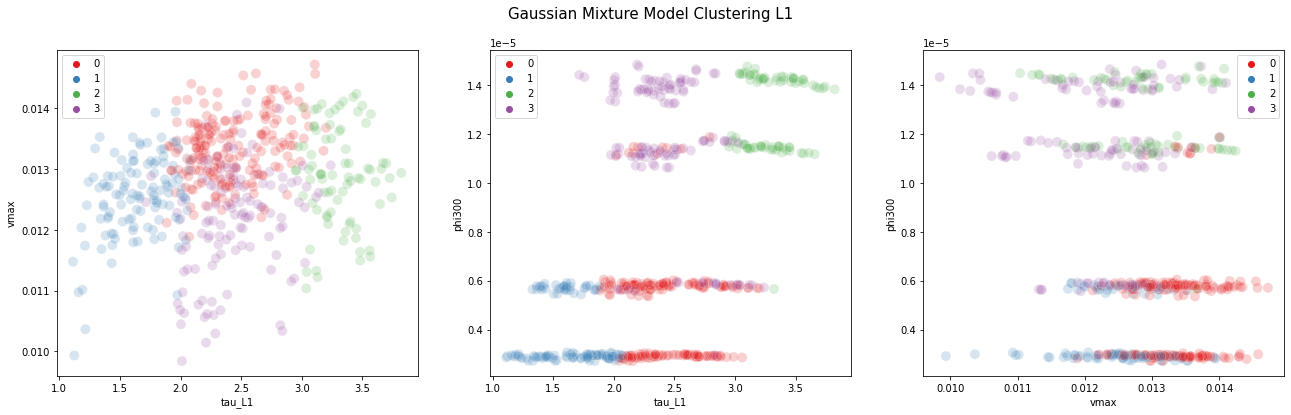

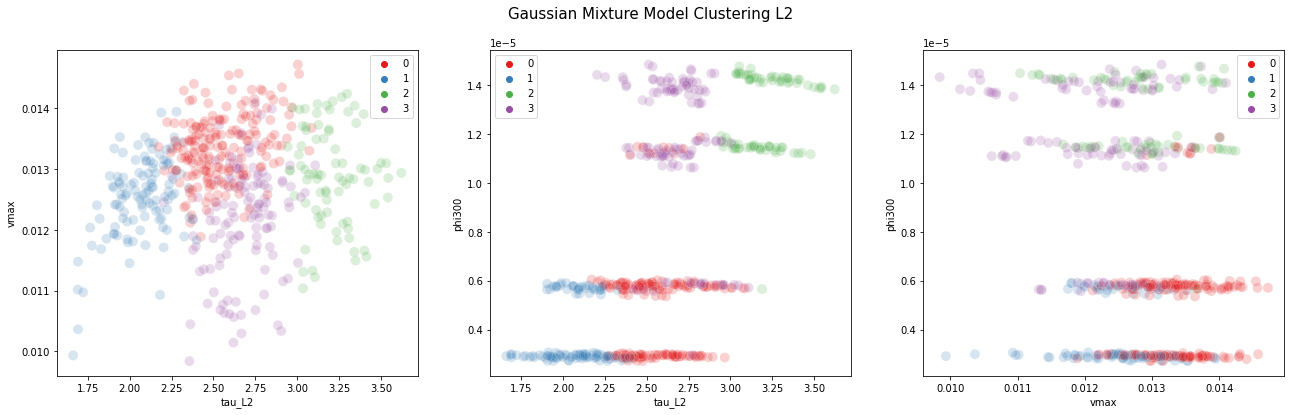

In [41]:
plot_clusters_2d_L1(clusters_gm, labels_gm, "Gaussian Mixture Model Clustering L1")
plot_clusters_2d_L2(clusters_gm, labels_gm, "Gaussian Mixture Model Clustering L2")
     

In [42]:
def prepare_cluster_df(cluster_data):
  '''
  prepares a complete dataframe to be used for regression 
  applies get_dummies to categorical, non-numerical data
  
  inputs:
  cluster_data - a single column of cluster result data
  returns:
  df_view - a dataframe with both physical and observable parameters, with
            cluster data results appended
  '''
  df_view = df_L2.copy()
  df_L1_concat = df_L1[["tau_L1", "tau_uncertainty_L1"]]
  df_view = pd.concat([df_L1_concat, df_view], axis=1, join='inner')
  df_view['cluster'] = cluster_data
  # get dummies - (results similar to one hot encoding)
  df_view = pd.get_dummies(df_view)
  return df_view

# prepare dataframe with kmeans clusters
cluster_data = clusters_kmeans['clusters']
df_kmeans = prepare_cluster_df(cluster_data)
df_kmeans.head()

tau_L1  tau_uncertainty_L1    tau_L2  tau_uncertainty_L2      vmax  \
0  1.333810            0.081978  1.940628            0.179354  0.013531   
1  1.853153            0.183197  2.071999            0.210287  0.012423   
2  1.682448            0.154169  2.007982            0.198804  0.012744   
3  1.123935            0.108683  1.661535            0.189436  0.009935   
4  1.295746            0.079293  1.907672            0.178607  0.013343   

   vmax_uncertainty    phi300  total_mass  mass_56_Ni  explosion_energy  \
0          0.000670  0.000003        0.75        0.15              0.75   
1          0.000615  0.000003        0.75        0.15              0.75   
2          0.000685  0.000003        0.75        0.15              0.75   
3          0.000349  0.000003        0.75        0.15              0.75   
4          0.000745  0.000003        0.75        0.15              2.00   

   cluster  init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
0        3                          0                          1   
1        3                          0                          1   
2        3                          0                          1   
3        3                          0                          1   
4        3                          0                          1   

   init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
0                         0                         1   
1                         0                         0   
2                         1                         0   
3                         0                         0   
4                         0                         1   

   init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
0                        0                         0  
1                        1                         0  
2                        0                         0  
3                        0                         1  
4                        0                         0

In [43]:
# prepare data frames with remaining four clustering algorithm results
df_agg = prepare_cluster_df(clusters_agg['clusters'])
df_ms = prepare_cluster_df(clusters_ms['clusters'])
df_dbscan = prepare_cluster_df(clusters_dbscan['clusters'])
df_gm = prepare_cluster_df(clusters_gm['clusters'])

In [44]:
# set up target: all physical parameters
target = list(df_kmeans.columns)
target.remove("tau_L1")
target.remove("tau_uncertainty_L1")
target.remove("tau_L2")
target.remove("tau_uncertainty_L2")
target.remove("vmax")
target.remove("vmax_uncertainty")
target.remove("phi300")
# set up features: observable parameters (not including uncertainties)
features = ["tau_L1", "tau_L2", "vmax", "phi300"]

In [45]:
# evaluate multioutput regression model with k-fold cross-validation
def repeated_kfold_regression(features, target, df):
  '''
  performs repeated k-fold regression

  inputs:
  features - array of model input categories
  target - array of model output categories
  df - dataframe containing both features and targets
  
  returns:
  results - dictionary in the format "MODEL NAME": [mean_MAE, std_MAE, mean_RMSE, std_RMSE]   
  '''
  cv = RepeatedKFold()
  X = df[features]
  y = df[target]
  models = {"RANDOM FOREST REGRESSION":RandomForestRegressor(), 
            "DECISION TREE REGRESSION":DecisionTreeRegressor(),
            "LINEAR REGRESSION":LinearRegression(),
            "K NEAREST NEIGHBORS REGRESSION": KNeighborsRegressor()}

  # mae and rmse cross validation results
  # dictionary in the format "MODEL NAME": [mean_MAE, std_MAE, mean_RMSE, std_RMSE]           
  results = {}

  for model in models:
    print(model)
    n_scores_MAE = cross_val_score(models[model], X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    n_scores_MAE = absolute(n_scores_MAE)
    n_scores_RMSE = cross_val_score(models[model], X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    n_scores_RMSE = absolute(n_scores_RMSE)

    # print mae, rmse, and nrmse
    normalize = y.mean()
    normalize = normalize.mean()
    print('MAE: %.3f (%.3f)' % (mean(n_scores_MAE), std(n_scores_MAE)))
    print('RMSE: %.3f (%.3f)' % (mean(n_scores_RMSE), std(n_scores_RMSE)))
    print('NRMSE: %.3f (%.3f)' % (mean(n_scores_RMSE/normalize), std(n_scores_RMSE/normalize)))
    results[model] = [mean(n_scores_MAE), std(n_scores_MAE), mean(n_scores_RMSE), std(n_scores_RMSE)]
  return results

print("KMEANS:")
kfold_kmeans_results = repeated_kfold_regression(features, target, df_kmeans)

KMEANS:
RANDOM FOREST REGRESSION
MAE: 0.250 (0.007)
RMSE: 0.344 (0.010)
NRMSE: 0.609 (0.018)
DECISION TREE REGRESSION
MAE: 0.240 (0.013)
RMSE: 0.462 (0.016)
NRMSE: 0.817 (0.028)
LINEAR REGRESSION
MAE: 0.316 (0.004)
RMSE: 0.368 (0.004)
NRMSE: 0.652 (0.008)
K NEAREST NEIGHBORS REGRESSION
MAE: 0.290 (0.008)
RMSE: 0.398 (0.007)
NRMSE: 0.703 (0.013)


In [46]:
print("AGGLOMERATIVE HIERARCHICAL")
kfold_agg_results = repeated_kfold_regression(features, target, df_agg)

AGGLOMERATIVE HIERARCHICAL
RANDOM FOREST REGRESSION
MAE: 0.245 (0.007)
RMSE: 0.346 (0.010)
NRMSE: 0.650 (0.019)
DECISION TREE REGRESSION
MAE: 0.234 (0.014)
RMSE: 0.456 (0.018)
NRMSE: 0.857 (0.035)
LINEAR REGRESSION
MAE: 0.355 (0.005)
RMSE: 0.407 (0.005)
NRMSE: 0.766 (0.010)
K NEAREST NEIGHBORS REGRESSION
MAE: 0.290 (0.007)
RMSE: 0.401 (0.011)
NRMSE: 0.754 (0.020)


In [47]:
print("MEAN SHIFT")
kfold_ms_results = repeated_kfold_regression(features, target, df_ms)

MEAN SHIFT
RANDOM FOREST REGRESSION
MAE: 0.241 (0.007)
RMSE: 0.329 (0.007)
NRMSE: 0.704 (0.015)
DECISION TREE REGRESSION
MAE: 0.230 (0.012)
RMSE: 0.438 (0.017)
NRMSE: 0.938 (0.037)
LINEAR REGRESSION
MAE: 0.295 (0.005)
RMSE: 0.345 (0.005)
NRMSE: 0.739 (0.011)
K NEAREST NEIGHBORS REGRESSION
MAE: 0.272 (0.006)
RMSE: 0.371 (0.008)
NRMSE: 0.794 (0.016)


In [48]:
print("DBSCAN")
kfold_dbscan_results = repeated_kfold_regression(features, target, df_dbscan)

DBSCAN
RANDOM FOREST REGRESSION
MAE: 0.240 (0.006)
RMSE: 0.331 (0.008)
NRMSE: 0.752 (0.018)
DECISION TREE REGRESSION
MAE: 0.231 (0.015)
RMSE: 0.441 (0.019)
NRMSE: 1.001 (0.044)
LINEAR REGRESSION
MAE: 0.285 (0.004)
RMSE: 0.344 (0.007)
NRMSE: 0.781 (0.016)
K NEAREST NEIGHBORS REGRESSION
MAE: 0.269 (0.005)
RMSE: 0.372 (0.008)
NRMSE: 0.845 (0.019)


In [49]:
print("GAUSSIAN MIXTURE MODEL")
kfold_gm_results = repeated_kfold_regression(features, target, df_gm)

GAUSSIAN MIXTURE MODEL
RANDOM FOREST REGRESSION
MAE: 0.248 (0.008)
RMSE: 0.358 (0.009)
NRMSE: 0.656 (0.016)
DECISION TREE REGRESSION
MAE: 0.240 (0.017)
RMSE: 0.469 (0.018)
NRMSE: 0.860 (0.032)
LINEAR REGRESSION
MAE: 0.323 (0.004)
RMSE: 0.382 (0.005)
NRMSE: 0.701 (0.010)
K NEAREST NEIGHBORS REGRESSION
MAE: 0.303 (0.008)
RMSE: 0.420 (0.010)
NRMSE: 0.769 (0.018)


In [50]:
# testing and training with kmeans data
train, test = train_test_split(df_kmeans, test_size=0.2, random_state=42, shuffle=True)

rff_model_kmeans = RandomForestRegressor()
rff_model_kmeans.fit(train[features], train[target])

train.head()

tau_L1  tau_uncertainty_L1    tau_L2  tau_uncertainty_L2      vmax  \
320  2.052015            0.120066  2.353068            0.197306  0.013479   
329  2.982108            0.221378  2.908650            0.237656  0.014348   
173  2.916139            0.204344  2.859190            0.225474  0.013094   
272  1.468565            0.106209  1.947764            0.189981  0.012584   
491  2.243230            0.124295  2.478306            0.194534  0.012945   

     vmax_uncertainty    phi300  total_mass  mass_56_Ni  explosion_energy  \
320          0.000524  0.000003         1.8        0.15              0.75   
329          0.000467  0.000006         1.8        0.30              0.75   
173          0.000472  0.000006         1.4        0.30              2.00   
272          0.000573  0.000003         1.0        0.15              0.75   
491          0.000550  0.000006         2.0        0.30              0.75   

     cluster  init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
320        1                          1                          0   
329        1                          1                          0   
173        1                          0                          0   
272        3                          1                          0   
491        1                          0                          0   

     init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
320                         0                          0   
329                         0                          0   
173                         1                          0   
272                         0                          0   
491                         0                          1   

     init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
320                         0                         1   
329                         0                         0   
173                         0                         0   
272                         0                         1   
491                         0                         0   

     init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
320                        0                         0  
329                        1                         0  
173                        1                         0  
272                        0                         0  
491                        0                         1

In [51]:
test.head()

tau_L1  tau_uncertainty_L1    tau_L2  tau_uncertainty_L2      vmax  \
304  2.161108            0.077273  2.545030            0.179055  0.013570   
495  2.218501            0.121266  2.456949            0.193417  0.012969   
439  2.020596            0.084531  2.378118            0.175505  0.011899   
153  2.742948            0.192009  2.760645            0.218073  0.013925   
497  3.446552            0.197329  3.310847            0.217219  0.011868   

     vmax_uncertainty    phi300  total_mass  mass_56_Ni  explosion_energy  \
304          0.000521  0.000011         1.4         0.6              0.75   
495          0.000591  0.000006         2.0         0.3              2.00   
439          0.000546  0.000011         1.4         0.6              2.00   
153          0.000584  0.000006         1.0         0.3              0.75   
497          0.000445  0.000011         2.0         0.6              0.75   

     cluster  init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
304        1                          1                          0   
495        1                          0                          0   
439        2                          0                          0   
153        1                          0                          0   
497        0                          0                          0   

     init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
304                         0                          0   
495                         0                          1   
439                         0                          1   
153                         1                          0   
497                         0                          1   

     init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
304                         0                         1   
495                         0                         0   
439                         0                         0   
153                         0                         0   
497                         0                         0   

     init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
304                        0                         0  
495                        0                         1  
439                        0                         1  
153                        1                         0  
497                        1                         0

In [52]:
def test_regression_results(tau_L1_test, tau_L2_test, vmax_test, phi300_test, model):
  """
  takes in observable parameters from test models (single test point)
  outputs regression model predictions 
  inputs:
  tau_L1_test - float value, a tau L1 test point
  tau_L2_test - float value, a tau L2 test point
  vmax_test - float value representing a vmax test point
  phi300_test - float value representing a phi300 test point
  model - the trained regression model used to produce a prediction
          for the test points

  returns:
  val_prediction_test_df - dataframe containing the prediction results for the test point
  """
  test_df = pd.DataFrame(np.array([[tau_L1_test, tau_L2_test, vmax_test, phi300_test]]), columns = features)
  val_prediction_test = model.predict(test_df[features])
  val_prediction_test_df = pd.DataFrame(val_prediction_test, columns = target)
  return val_prediction_test_df

In [53]:
# model-predicted test results (103 rows - 20% of data)
test_predictions = rff_model_kmeans.predict(test[features])
test_predictions = pd.DataFrame(test_predictions, columns=target)
test_predictions.head()

total_mass  mass_56_Ni  explosion_energy  cluster  \
0       1.582      0.5970            1.6750     1.01   
1       1.649      0.2640            1.4750     1.00   
2       1.480      0.6150            0.9750     2.07   
3       1.452      0.2655            1.6375     1.00   
4       1.770      0.6735            1.8000     0.04   

   init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
0                       0.95                       0.05   
1                       0.14                       0.05   
2                       0.00                       0.44   
3                       0.43                       0.07   
4                       0.00                       0.00   

   init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
0                      0.00                       0.00   
1                      0.47                       0.34   
2                      0.00                       0.56   
3                      0.50                       0.00   
4                      0.01                       0.99   

   init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
0                      0.00                      0.74   
1                      0.18                      0.36   
2                      0.00                      0.19   
3                      0.24                      0.00   
4                      0.02                      0.00   

   init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
0                     0.00                      0.26  
1                     0.03                      0.43  
2                     0.00                      0.81  
3                     0.75                      0.01  
4                     0.98                      0.00

In [54]:
# model-predicted test values - flag and cluster results transformed via rounding
encoded_params = ["cluster","init_SNeIa_dist_flag_N100","init_SNeIa_dist_flag_hed8","init_SNeIa_dist_flag_mwd","init_SNeIa_dist_flag_w7dt","init_56Ni_dist_flag_N100","init_56Ni_dist_flag_hed8","init_56Ni_dist_flag_mwd","init_56Ni_dist_flag_w7dt"]
test_predictions[encoded_params] = pd.DataFrame(np.round(test_predictions[encoded_params], decimals = 0))
for p in encoded_params:
  test_predictions[p] = test_predictions[p].astype(float).astype(int)
test_predictions.head()

total_mass  mass_56_Ni  explosion_energy  cluster  \
0       1.582      0.5970            1.6750        1   
1       1.649      0.2640            1.4750        1   
2       1.480      0.6150            0.9750        2   
3       1.452      0.2655            1.6375        1   
4       1.770      0.6735            1.8000        0   

   init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
0                          1                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
0                         0                          0   
1                         0                          0   
2                         0                          1   
3                         0                          0   
4                         0                          1   

   init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
0                         0                         1   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
0                        0                         0  
1                        0                         0  
2                        0                         1  
3                        1                         0  
4                        1                         0

In [55]:
# ground truth values from dataset (test data isolated from training data)
test[target].head()

total_mass  mass_56_Ni  explosion_energy  cluster  \
304         1.4         0.6              0.75        1   
495         2.0         0.3              2.00        1   
439         1.4         0.6              2.00        2   
153         1.0         0.3              0.75        1   
497         2.0         0.6              0.75        0   

     init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
304                          1                          0   
495                          0                          0   
439                          0                          0   
153                          0                          0   
497                          0                          0   

     init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
304                         0                          0   
495                         0                          1   
439                         0                          1   
153                         1                          0   
497                         0                          1   

     init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
304                         0                         1   
495                         0                         0   
439                         0                         0   
153                         0                         0   
497                         0                         0   

     init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
304                        0                         0  
495                        0                         1  
439                        0                         1  
153                        1                         0  
497                        1                         0

In [56]:
# accuracy - fraction of correctly identified samples
accuracy = accuracy_score(test['cluster'], test_predictions['cluster'])
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 92.23


In [57]:
# get accuracy for all categorical parameters
for param in encoded_params:
  # fraction of correctly identified samples
  accuracy = accuracy_score(test[param], test_predictions[param])
  print(param, 'Accuracy: %.2f' % (accuracy*100))

cluster Accuracy: 92.23
init_SNeIa_dist_flag_N100 Accuracy: 84.47
init_SNeIa_dist_flag_hed8 Accuracy: 71.84
init_SNeIa_dist_flag_mwd Accuracy: 75.73
init_SNeIa_dist_flag_w7dt Accuracy: 85.44
init_56Ni_dist_flag_N100 Accuracy: 88.35
init_56Ni_dist_flag_hed8 Accuracy: 91.26
init_56Ni_dist_flag_mwd Accuracy: 90.29
init_56Ni_dist_flag_w7dt Accuracy: 81.55


In [58]:
# percent error
numerical_physical = ["total_mass", "mass_56_Ni", "explosion_energy"]
for param in numerical_physical:
  # temporary dataframe for percent errors
  percent_error_df = pd.DataFrame({'percent_error':[]})
  for i in range(len(test)):
    percent_error = abs((test_predictions[param].iloc[i] - test[param].iloc[i])/test[param].iloc[i])*100
    err = pd.DataFrame({'percent_error':[percent_error]})
    percent_error_df = percent_error_df.append(err)
  # print average percent error for each numerical physical param
  print(param, "Percent Error:", percent_error_df['percent_error'].mean(), '%')

total_mass Percent Error: 14.962239944521498 %
mass_56_Ni Percent Error: 21.604854368932045 %
explosion_energy Percent Error: 64.16868932038835 %


In [59]:
# create physical model data dataframes
df_physical_L1 = pd.read_csv('GSOC_Physical_L1.txt', sep=" ", header=None)
df_physical_L1.columns = ["tau_L1", "tau_uncertainty_L1", "vmax", "vmax_uncertainty", "phi300", "model", "56_Ni"]
df_physical_L2 = pd.read_csv('GSOC_Physical_L2.txt', sep=" ", header=None)
df_physical_L2.columns = ["tau_L2", "tau_uncertainty_L2", "vmax", "vmax_uncertainty", "phi300", "model", "56_Ni"]

In [60]:
df_physical_L1

tau_L1  tau_uncertainty_L1      vmax  vmax_uncertainty    phi300  \
0   2.645992            0.189259  0.014129          0.000672  0.000038   
1   2.456980            0.193291  0.013269          0.000754  0.000034   
2   3.091731            0.175764  0.014164          0.000664  0.000071   
3   3.347267            0.197745  0.013167          0.000434  0.000063   
4   3.641698            0.228735  0.014654          0.000662  0.000065   
5   5.517294            0.267900  0.014804          0.000348  0.000062   
6   2.514767            0.320453  0.014224          0.000589  0.000058   
7   2.218849            0.064379  0.013291          0.000507  0.000068   
8   2.409807            0.125803  0.012595          0.000308  0.000027   
9   2.191378            0.099214  0.012991          0.000519  0.000053   
10  2.981437            0.180488  0.011948          0.000402  0.000062   
11  3.049625            0.169222  0.014206          0.000448  0.000062   
12  2.722351            0.132903  0.012256          0.000485  0.000064   
13  2.113932            0.083042  0.011537          0.000512  0.000076   
14  3.001088            0.195190  0.011956          0.000363  0.000062   

           model  56_Ni  
0   7p0z22d07_27   0.37  
1   7p0z22d20_27   0.33  
2         dd202c   0.72  
3            dd4   0.61  
4         det2e2   0.63  
5         det2e6   0.63  
6           det2   0.55  
7           hecd   0.72  
8           hed6   0.26  
9           hed8   0.51  
10           m36   0.59  
11          N100   0.60  
12          w7dn   0.62  
13          w7dt   0.76  
14            W7   0.58

In [61]:
df_physical_L2

tau_L2  tau_uncertainty_L2      vmax  vmax_uncertainty    phi300  \
0   2.650142            0.219829  0.014129          0.000672  0.000007   
1   2.478129            0.220931  0.013269          0.000754  0.000006   
2   2.980999            0.211429  0.014164          0.000664  0.000013   
3   3.144127            0.222726  0.013167          0.000434  0.000012   
4   3.350818            0.244213  0.014654          0.000662  0.000012   
5   4.848555            0.270838  0.014804          0.000348  0.000011   
6   2.481959            0.340245  0.014224          0.000589  0.000011   
7   2.550879            0.168934  0.013291          0.000507  0.000013   
8   2.542144            0.200697  0.012595          0.000308  0.000005   
9   2.457540            0.189929  0.012991          0.000519  0.000010   
10  2.868961            0.212971  0.011948          0.000402  0.000011   
11  2.955371            0.212819  0.014206          0.000448  0.000011   
12  2.755769            0.196221  0.012256          0.000485  0.000012   
13  2.394430            0.171817  0.011537          0.000512  0.000015   
14  2.862006            0.219043  0.011956          0.000363  0.000012   

           model  56_Ni  
0   7p0z22d07_27   0.37  
1   7p0z22d20_27   0.33  
2         dd202c   0.72  
3            dd4   0.61  
4         det2e2   0.63  
5         det2e6   0.63  
6           det2   0.55  
7           hecd   0.72  
8           hed6   0.26  
9           hed8   0.51  
10           m36   0.59  
11          N100   0.60  
12          w7dn   0.62  
13          w7dt   0.76  
14            W7   0.58

In [62]:
def physical_cluster_predictions(model):
  '''
  uses trained regression model to produce predictions for physical model data
  df_physical_L1 and df_physical_L2

  inputs:
  model - regression model trained on gamma-ray L1 and L2 supernova simulation 
          data

  outputs:
  test_result_df - dataframe with physical parameter and cluster predictions
  '''
  # initialize df
  test_result_df = pd.DataFrame()
  # predict each test point
  for i in range(len(df_physical_L2)):
    test_result_df = test_result_df.append(test_regression_results(df_physical_L1["tau_L1"].iloc[i], df_physical_L2["tau_L2"].iloc[i], df_physical_L2["vmax"].iloc[i], df_physical_L2["phi300"].iloc[i], model))
  return test_result_df

# produce physical model test results
test_result_df = physical_cluster_predictions(rff_model_kmeans)
cluster_test_df = test_result_df[['cluster']]
cluster_test_df.head()

cluster
0     1.00
0     1.00
0     0.21
0     0.00
0     0.05

In [63]:
# round the cluster data
cluster_test_round = pd.DataFrame(np.round(cluster_test_df['cluster'], decimals = 0))
cluster_test_round.head()

cluster
0      1.0
0      1.0
0      0.0
0      0.0
0      0.0

In [64]:
# combine physical model L1 and L2 data
df_physical = df_physical_L1.copy()
df_physical = df_physical.drop(columns=['phi300', 'vmax', 'vmax_uncertainty', 'model', '56_Ni'])
df_physical = pd.concat([df_physical, df_physical_L2], axis=1, join='inner')
df_physical.head()

tau_L1  tau_uncertainty_L1    tau_L2  tau_uncertainty_L2      vmax  \
0  2.645992            0.189259  2.650142            0.219829  0.014129   
1  2.456980            0.193291  2.478129            0.220931  0.013269   
2  3.091731            0.175764  2.980999            0.211429  0.014164   
3  3.347267            0.197745  3.144127            0.222726  0.013167   
4  3.641698            0.228735  3.350818            0.244213  0.014654   

   vmax_uncertainty    phi300         model  56_Ni  
0          0.000672  0.000007  7p0z22d07_27   0.37  
1          0.000754  0.000006  7p0z22d20_27   0.33  
2          0.000664  0.000013        dd202c   0.72  
3          0.000434  0.000012           dd4   0.61  
4          0.000662  0.000012        det2e2   0.63

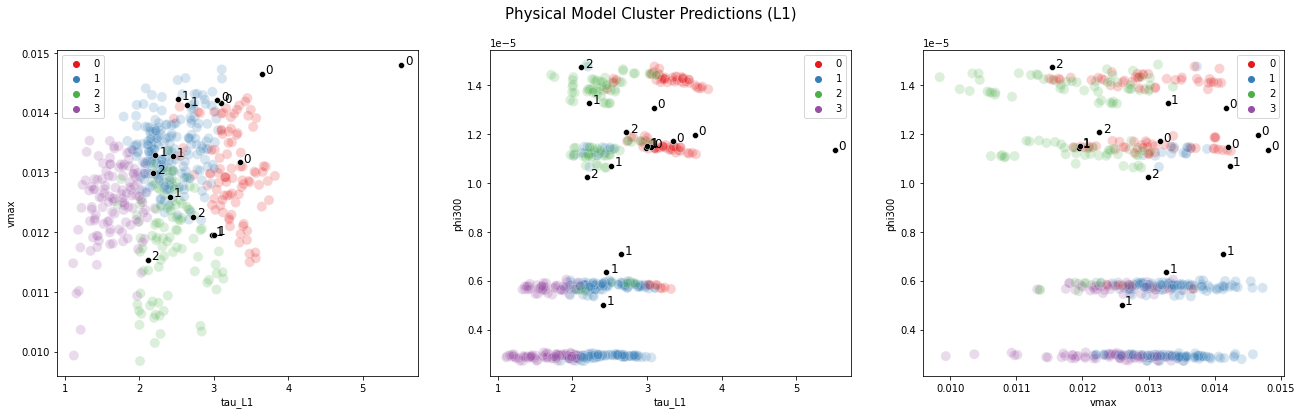

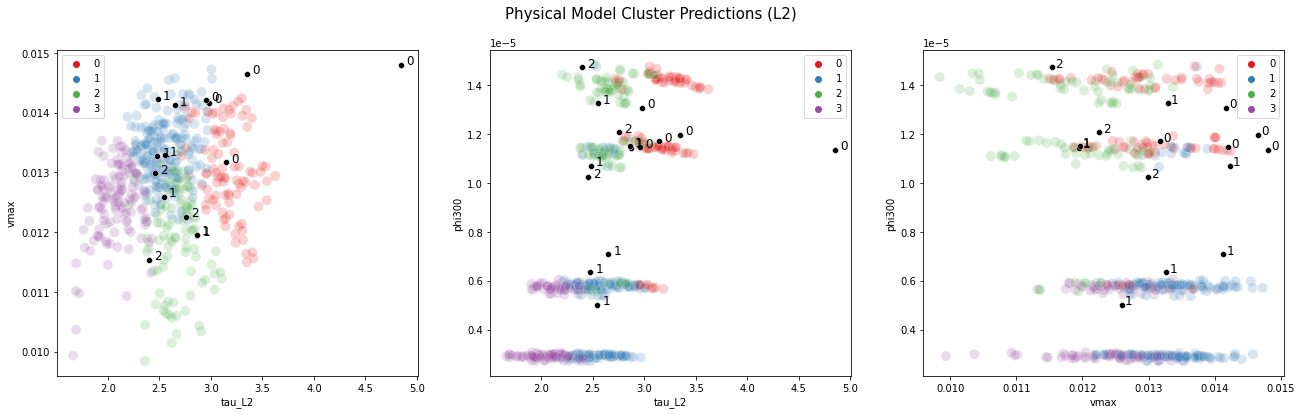

In [65]:
def plot_predictions(labels, clusters, df_physical, cluster_test_round):
  '''
  plot L1 and L2 physical data predictions

  inputs:
  labels - dataframe of cluster labels for the "clusters" parameter
  clusters - dataframe of supernova simulation gamma ray data for L1 and L2
  df_physical - dataframe of physical model test points
  cluster_test_round - dataframe of cluster predictions for each test point (rounded)
  '''
  # L1 plots
  fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
  sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,2], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax1)
  sns.scatterplot(x='tau_L1', y='vmax', data=df_physical, color='black', ax=ax1)
  sns.scatterplot(clusters.iloc[:,0],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax2)
  sns.scatterplot(x='tau_L1', y='phi300', data=df_physical, color='black', ax=ax2) #fix - use df_physical for phi300
  sns.scatterplot(clusters.iloc[:,2],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax3)
  sns.scatterplot(x='vmax', y='phi300', data=df_physical, color='black', ax=ax3)

  for i in range(len(df_physical)):
    ax1.text(df_physical["tau_L1"].iloc[i]+.05, df_physical["vmax"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')
    ax2.text(df_physical["tau_L1"].iloc[i]+.05, df_physical["phi300"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')
    ax3.text(df_physical["vmax"].iloc[i]+.00005, df_physical["phi300"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')

  fig.suptitle("Physical Model Cluster Predictions (L1)", fontsize=15) 
  plt.show()

  # L2 plots
  fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(22,6))
  sns.scatterplot(clusters.iloc[:,1],clusters.iloc[:,2], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax1)
  sns.scatterplot(x='tau_L2', y='vmax', data=df_physical, color='black', ax=ax1)
  sns.scatterplot(clusters.iloc[:,1],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax2)
  sns.scatterplot(x='tau_L2', y='phi300', data=df_physical, color='black', ax=ax2)
  sns.scatterplot(clusters.iloc[:,2],clusters.iloc[:,3], hue=labels, palette='Set1', s=100, alpha=0.2, ax=ax3)
  sns.scatterplot(x='vmax', y='phi300', data=df_physical, color='black', ax=ax3)

  for i in range(len(df_physical)):
    ax1.text(df_physical["tau_L2"].iloc[i]+.05, df_physical["vmax"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')
    ax2.text(df_physical["tau_L2"].iloc[i]+.05, df_physical["phi300"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')
    ax3.text(df_physical["vmax"].iloc[i]+.00005, df_physical["phi300"].iloc[i], '%s' % (str(int(cluster_test_round['cluster'].iloc[i]))), size=12, zorder=1, color='k')

  fig.suptitle("Physical Model Cluster Predictions (L2)", fontsize=15) 
  plt.show()

# plot cluster predictions for physical models, overlaying observable params from simulation data
labels = labels_kmeans.copy()
clusters = clusters_kmeans
plot_predictions(labels, clusters, df_physical, cluster_test_round)

In [66]:
# test train split with mean shift cluster data
# combined with simulation data
train, test = train_test_split(df_ms, test_size=0.2, random_state=42, shuffle=True)

# train random forest regressor
rff_model_ms = RandomForestRegressor()
rff_model_ms.fit(train[features], train[target])
train.head()

tau_L1  tau_uncertainty_L1    tau_L2  tau_uncertainty_L2      vmax  \
320  2.052015            0.120066  2.353068            0.197306  0.013479   
329  2.982108            0.221378  2.908650            0.237656  0.014348   
173  2.916139            0.204344  2.859190            0.225474  0.013094   
272  1.468565            0.106209  1.947764            0.189981  0.012584   
491  2.243230            0.124295  2.478306            0.194534  0.012945   

     vmax_uncertainty    phi300  total_mass  mass_56_Ni  explosion_energy  \
320          0.000524  0.000003         1.8        0.15              0.75   
329          0.000467  0.000006         1.8        0.30              0.75   
173          0.000472  0.000006         1.4        0.30              2.00   
272          0.000573  0.000003         1.0        0.15              0.75   
491          0.000550  0.000006         2.0        0.30              0.75   

     cluster  init_SNeIa_dist_flag_N100  init_SNeIa_dist_flag_hed8  \
320        0                          1                          0   
329        0                          1                          0   
173        1                          0                          0   
272        0                          1                          0   
491        0                          0                          0   

     init_SNeIa_dist_flag_mwd  init_SNeIa_dist_flag_w7dt  \
320                         0                          0   
329                         0                          0   
173                         1                          0   
272                         0                          0   
491                         0                          1   

     init_56Ni_dist_flag_N100  init_56Ni_dist_flag_hed8  \
320                         0                         1   
329                         0                         0   
173                         0                         0   
272                         0                         1   
491                         0                         0   

     init_56Ni_dist_flag_mwd  init_56Ni_dist_flag_w7dt  
320                        0                         0  
329                        1                         0  
173                        1                         0  
272                        0                         0  
491                        0                         1

In [67]:
# obtain cluster predictions and round
test_ms_df = physical_cluster_predictions(rff_model_ms)
cluster_test_ms_df = test_ms_df[['cluster']]
cluster_test_ms_round = pd.DataFrame(np.round(cluster_test_ms_df['cluster'], decimals = 0))
cluster_test_ms_round.head()

cluster
0      0.0
0      0.0
0      1.0
0      1.0
0      1.0

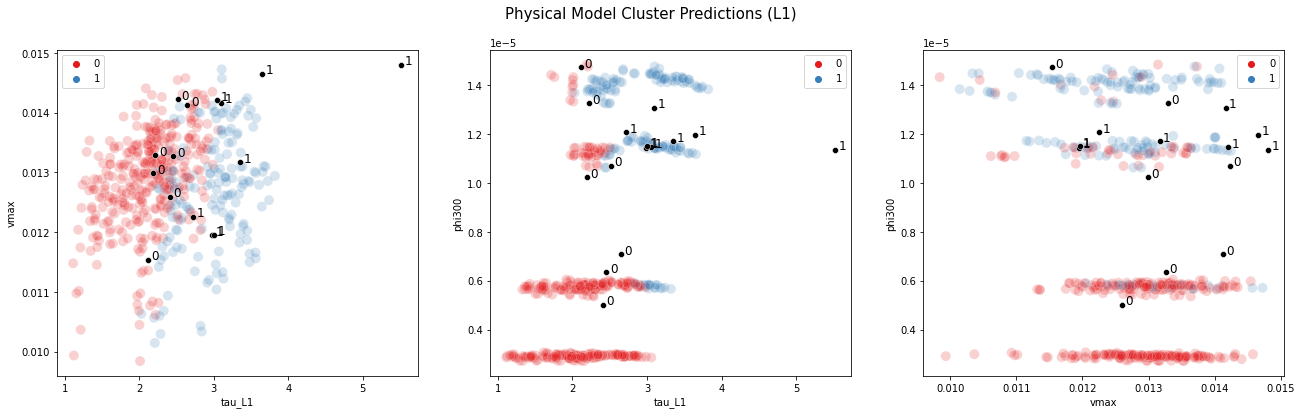

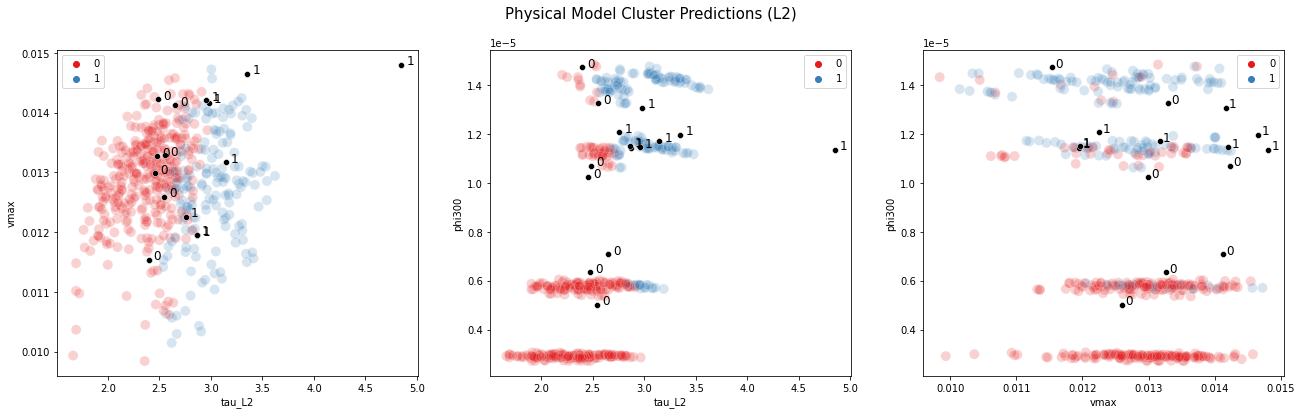

In [68]:
# plot physical test point predictions
labels = labels_ms.copy()
clusters = clusters_ms
plot_predictions(labels, clusters, df_physical, cluster_test_ms_round)